# Exploring Hacker News Posts

## Objective

In this project we will be exploring the Hacker News dataset. Hacker News is a site started by an incubator Y combinator where user submitted posts are voted and commented upon similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result. The original dataset can be downloaded from this [link](https://www.kaggle.com/hacker-news/hacker-news-posts). This dataset contains 300,000 rows however, the dataset that we are using in analysis has been reduced to 20,000 rows as we are not interested in submissions that did not receive any comments.

I want my submission on hacker news to get the most comments and for that I need to get the answers for the following questions while I am analyzing my dataset.
<ul>
    <li>Do Ask HN or Show HN receive more comments on average?</li>
    <li>Do posts created at a certain time receive more comments on average?</li>
</ul>


## Data Exploration

In [1]:
#Importing necessary libraries
from csv import reader
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
opened_file=open("hacker_news.csv") #opening the csv file
hn=list(reader(opened_file)) #converting it to a list
print('columns:- ') #printing out the column names
print(hn[0])
hn_wout_headers=hn[1:] #separating column names from the dataset


columns:- 
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


Columns num_points , num_comments, and created_at seem important for this analysis

## Data Filteration

In [14]:
#Separating Ask and Show posts
ask_posts=[]#A list containg all the details about Ask posts
show_posts=[]#A list containing all the details about Show posts
other_posts=[]#A list containing all the details about posts other than Ask or Show

#Separating the posts into different lists
for row in hn_wout_headers:
    title=row[1]
    title=title.lower()
    if title.startswith("ask hn"):
        ask_posts.append(row)
    elif title.startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
        
print("Number of Ask Posts: ",len(ask_posts))
print("Number of Show Posts: ",len(show_posts))
print("Number of Other Posts: ",len(other_posts))

Number of Ask Posts:  1744
Number of Show Posts:  1162
Number of Other Posts:  17194


At Hacker News the posts can be classified into 3 main types: Ask, Show, and others. By running the above loop we have counted all the posts whose title contains 'ask hn' or 'show hn'. The title can contain ask or show in both uppercase as well as lowercase due to which I converted the title to lowercase and then checked whether it starts with 'ask hn' or 'show hn'. 

## Data Analysis

### Part One

I have created a function analyze_comments that takes in a list of posts and returns the total and average number of comments made for that type of post.

In [4]:
#Identifying the type having the highest number of comments.
def analyze_comments(posts):
    total_number_of_comments=0
    for row in posts:
        comments=float(row[4])
        total_number_of_comments+=comments
    avg_ask_comments=total_number_of_comments/len(posts)
    return total_number_of_comments,avg_ask_comments


print(analyze_comments(ask_posts))
print(analyze_comments(show_posts))
print(analyze_comments(other_posts))

(24483.0, 14.038417431192661)
(11988.0, 10.31669535283993)
(462055.0, 26.8730371059672)


Among Ask and Show posts Ask posts have the highest number of comments (24483.0) , and average number of comments (14.038). 

### Part Two

I am using Ask posts for the rest of the analysis. Now I am interested in knowing the time when most posts were made along with the time when most comments were made. These results will give me an idea of user engagement on Hacker News.

In [15]:
#Finding the amount of ask posts and comments 

result_list=[]
for row in ask_posts:
    data=[]
    created_at=row[6]
    comments=float(row[4])
    data.append(created_at)
    data.append(comments)
    result_list.append(data)

counts_by_hour={} #Dictionary that would contain the number of posts for a particular hour.
comments_by_hour={} #Dictionary that would contain the comments on a post for a particular hour.

for data in result_list:
    date=data[0]
    dt_object=dt.datetime.strptime(date,"%m/%d/%Y %H:%M")
    dt_string=dt_object.strftime("%H")
    if dt_string in counts_by_hour:
        counts_by_hour[dt_string]+=1
        comments_by_hour[dt_string]+=data[1]
    else:
        counts_by_hour[dt_string]=1
        comments_by_hour[dt_string]=data[1]
        
        
print(counts_by_hour)
print(comments_by_hour)


{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
{'09': 251.0, '13': 1253.0, '10': 793.0, '14': 1416.0, '16': 1814.0, '23': 543.0, '12': 687.0, '17': 1146.0, '15': 4477.0, '21': 1745.0, '20': 1722.0, '02': 1381.0, '18': 1439.0, '03': 421.0, '05': 464.0, '19': 1188.0, '01': 683.0, '22': 479.0, '08': 492.0, '04': 337.0, '00': 447.0, '06': 397.0, '07': 267.0, '11': 641.0}


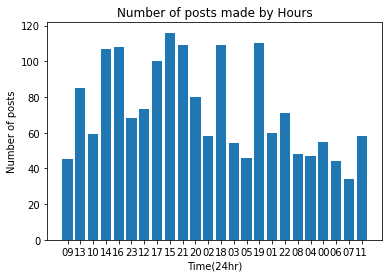

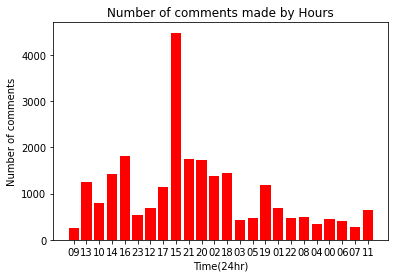

In [16]:
#Plotting the number of posts
plt.bar(range(len(counts_by_hour)),counts_by_hour.values(),tick_label=list(counts_by_hour.keys()))
plt.title('Number of posts made by Hours')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of posts')
plt.show()
#Plotting comments on a post
plt.bar(range(len(comments_by_hour)),comments_by_hour.values(),tick_label=list(comments_by_hour.keys()),color='r')
plt.title('Number of comments made by Hours')
plt.xlabel('Time(24hr)')
plt.ylabel('Number of comments')
plt.show()

By observing both the graphs it seems that user engagement is at its peak between 1400-1900. However, we can see that user engagement shoots off the chart at 1500 as the number of comments made are 2000 more than hour before or after it. Still neither number of posts nor number of comments alone can identify the prime time to make a post and grab the attention. What I think I need is the number of comments per post for that particular hour?

### Part three

Now we will be calculating the average number of comments for Ask HN posts by hour. The task will be performed using a for-loop and the results will be stored in the form of a dictionary.

In [7]:
#Calculating the Average Number of Comments for Ask HN Posts by Hour

avg_by_hour={} #Dictionary that would contain the average number of comments for Ask HN posts by Hour

for key in counts_by_hour:
    avg_by_hour[key]=comments_by_hour[key]/counts_by_hour[key]
    
print(avg_by_hour)

{'09': 5.5777777777777775, '13': 14.741176470588234, '10': 13.440677966101696, '14': 13.233644859813085, '16': 16.796296296296298, '23': 7.985294117647059, '12': 9.41095890410959, '17': 11.46, '15': 38.5948275862069, '21': 16.009174311926607, '20': 21.525, '02': 23.810344827586206, '18': 13.20183486238532, '03': 7.796296296296297, '05': 10.08695652173913, '19': 10.8, '01': 11.383333333333333, '22': 6.746478873239437, '08': 10.25, '04': 7.170212765957447, '00': 8.127272727272727, '06': 9.022727272727273, '07': 7.852941176470588, '11': 11.051724137931034}


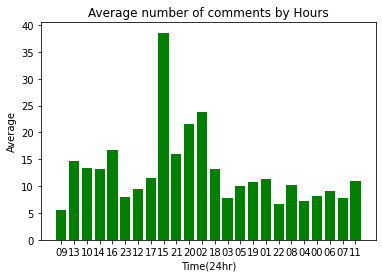

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


In [17]:
#Plotting average number of comments on a post by hour.
plt.bar(range(len(avg_by_hour)),avg_by_hour.values(),tick_label=list(avg_by_hour.keys()),color='g')
plt.title('Average number of comments by Hours')
plt.xlabel('Time(24hr)')
plt.ylabel('Average')
plt.show()
#Extracting the top 5 hours with a high user engagement.
swap_avg_by_hour=[]
for key in avg_by_hour:
    temp_list=[]
    temp_list.append(avg_by_hour[key])
    temp_list.append(key)
    swap_avg_by_hour.append(temp_list)
    
sorted_swap=sorted(swap_avg_by_hour,reverse=True)

print("Top 5 Hours for Ask Posts Comments")
string_format="{time}: {val:.2f} average comments per post"
for row in sorted_swap[:5]:
    date=row[1]
    val=row[0]
    dt_object=dt.datetime.strptime(date,"%H")
    dt_string=dt_object.strftime("%H:%M")
    print(string_format.format(time=dt_string,val=val))
    

    
    
    
    

## Conclusion

After looking at the plots and the details above it seems that the ideal time to create an ask post would be between 3pm-5pm or 7pm-9pm Eastern Time US. Now I live in Pakistan therefore I have to create an ask post between 12am-2am or 4am-6am because my timezone is 9 hours ahead of the Eastern Timezone US. According to the analysis above any 'Ask' post created during this time would engage a larger audience perhaps because many people are free, having a lunch,or dinner break, or taking time off from work to relax a bit.